In [56]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('WeatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [58]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Observations about dataset
Firstly, we explore the dataset
### Features of dataset

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

### Label

Prediction :   Make two prediction  1) Rainfall    2) RainTomorrow  

In [59]:
df.shape

(8425, 23)

### we have 8425 rows and 23 columns


In [60]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [61]:
# let's check null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

### Most of the columns are having null values to handle this problem we will use imputing techniques

<AxesSubplot:>

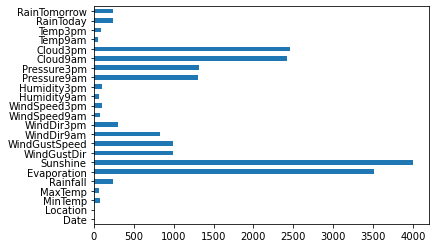

In [62]:
df.isna().sum().plot.barh()

### Sunshine and Evaporation columns are having more than 40% missing values

In [63]:
df.drop(columns=['Sunshine','Evaporation'],inplace = True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   WindGustDir    7434 non-null   object 
 6   WindGustSpeed  7434 non-null   float64
 7   WindDir9am     7596 non-null   object 
 8   WindDir3pm     8117 non-null   object 
 9   WindSpeed9am   8349 non-null   float64
 10  WindSpeed3pm   8318 non-null   float64
 11  Humidity9am    8366 non-null   float64
 12  Humidity3pm    8323 non-null   float64
 13  Pressure9am    7116 non-null   float64
 14  Pressure3pm    7113 non-null   float64
 15  Cloud9am       6004 non-null   float64
 16  Cloud3pm       5970 non-null   float64
 17  Temp9am        8369 non-null   float64
 18  Temp3pm 

### Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow features are having object type values .we will use encoding techniques to handles this situation.

In [65]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [66]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

            Date     Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
3674  20-10-2015  Williamtown     13.1     31.6       0.0           E   
3675  21-10-2015  Williamtown     16.6     34.1       0.0         NNW   
3676  22-10-2015  Williamtown     17.5     26.3      19.8          SW   
3677  23-10-2015  Williamtown     14.7     21.4       NaN           S   
3678  24-10-2015  Williamtown     11.0     22.5       NaN           E   
3679  25-10-2015  Williamtown     10.8     27.8      24.8         ENE   
3680  26-10-2015  Williamtown     14.0     33.6       0.0          SW   
3681  27-10-2015  Williamtown     16.7     20.3       9.2           S   
3682  28-10-2015  Williamtown     13.3     21.4       1.8          SE   
3683  29-10-2015  Williamtown     12.2     22.2       0.0          SE   
3684  30-10-2015  Williamtown      9.1     24.4       0.0         ESE   
3685  31-10-2015  Williamtown     12.1     25.8       0.0          NE   
3686  01-11-2015  Williamtown     15.0     30.2    

In [67]:
# let's drop the duplicates
df.drop_duplicates(inplace = True)

In [68]:
df.shape

(6762, 21)

###  Now, We have 6762 rows and 21 columns

In [69]:
#let's convert the date column
df['Date']=pd.to_datetime(df['Date'])
df['Day']= df['Date'].apply(lambda dt:dt.day)
df['Month']= df['Date'].apply(lambda dt:dt.month)
df['Year']=df['Date'].apply(lambda dt:dt.year)

In [70]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-01-12,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,2008-02-12,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008
2,2008-03-12,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,3,2008
3,2008-04-12,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,4,2008
4,2008-05-12,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008


In [71]:
df.drop(columns=['Date'],inplace = True)

In [72]:
df.shape

(6762, 23)

In [73]:
categorical = df.select_dtypes(include=['object'])
categorical.head()


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


- There are 6 categorical variables. They are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow
- There are two binary categorical variables - RainToday and RainTomorrow
- RainTomorrow is the target variable.



In [77]:
for column in df.columns:
    if df[column].dtype== object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------')

Location:['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
---------------------------------------------------------------------------------
WindGustDir:['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
E      518
SW     465
N      459
W      434
WSW    420
WNW    398
SSE    390
S      376
SE     370
ENE    357
NE     300
SSW    299
NW     296
NNE    287
ESE    267
NNW    184
Name: WindGustDir, dtype: int64
---------------------------------------------------------------------------------
WindDir9am:['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW

In [74]:
continuous = df.select_dtypes(include=['float'])
continuous.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [108]:
df.drop(columns=['Cloud9am','Cloud3pm'],inplace = True)

# EDA

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

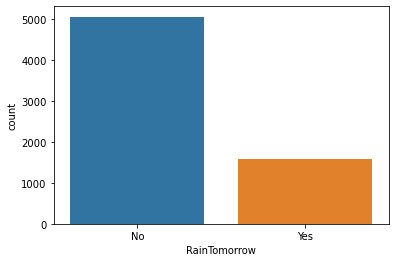

In [75]:
sns.countplot(x='RainTomorrow',data= df)

In [76]:
print(df['RainTomorrow'].value_counts())


No     5052
Yes    1572
Name: RainTomorrow, dtype: int64


### We can observe that the ratio between NO and YES is almost 78:22. So there is a class imbalance and we have to deal with it. We will use the oversampling of the minority class as the size of the data is quite small.



In [48]:
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)


In [49]:
from sklearn.utils import resample


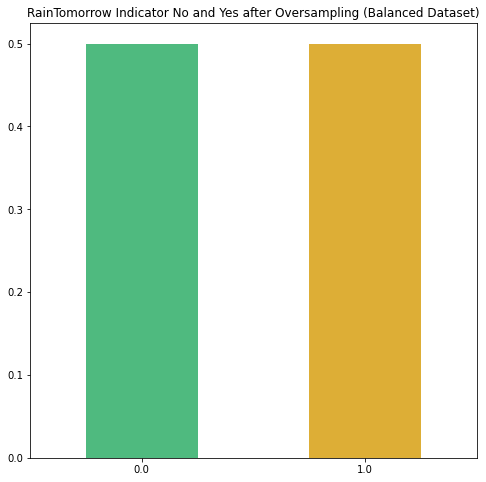

In [50]:
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,8))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['MediumSeaGreen','Goldenrod'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes after Oversampling (Balanced Dataset)')
plt.show()

In [51]:
oversampled.RainTomorrow.value_counts()


0.0    5052
1.0    5052
Name: RainTomorrow, dtype: int64

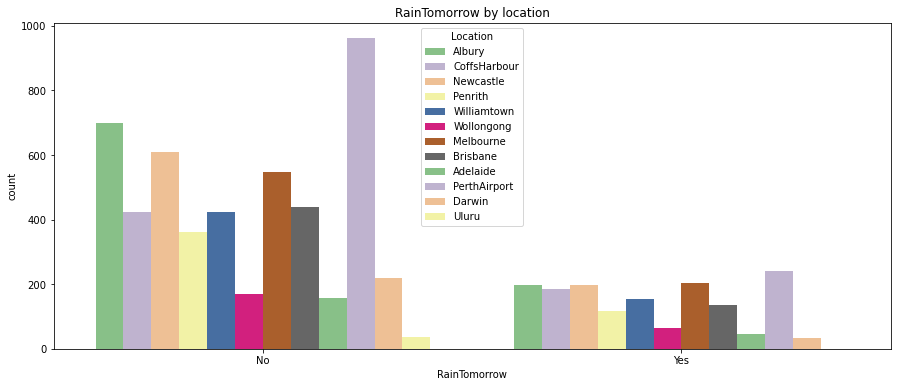

In [78]:
#let's visualize the relationship between RainTomorrow and Location
plt.figure(figsize=(15,6))
sns.countplot(x=df['RainTomorrow'],hue='Location',data=df, palette = 'Accent').set_title("RainTomorrow by location")
plt.show()

In [80]:
df.groupby('RainTomorrow')['Location'].value_counts()


RainTomorrow  Location    
No            PerthAirport    962
              Albury          699
              Newcastle       610
              Melbourne       548
              Brisbane        439
              CoffsHarbour    424
              Williamtown     424
              Penrith         363
              Darwin          218
              Wollongong      171
              Adelaide        156
              Uluru            38
Yes           PerthAirport    242
              Melbourne       203
              Albury          199
              Newcastle       198
              CoffsHarbour    186
              Williamtown     153
              Brisbane        135
              Penrith         116
              Wollongong       63
              Adelaide         45
              Darwin           32
Name: Location, dtype: int64

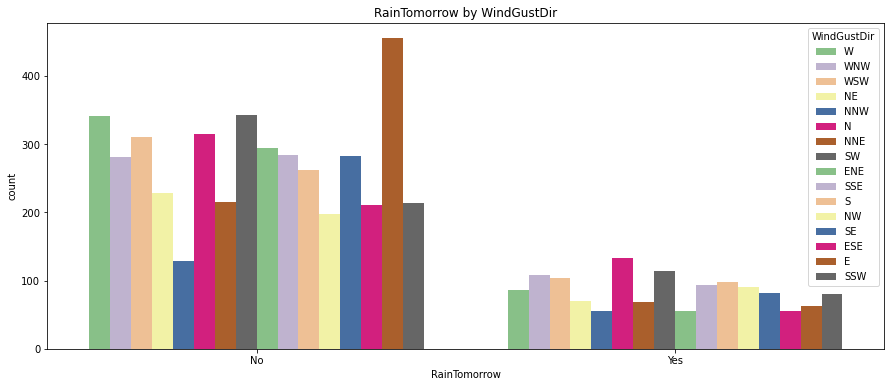

In [79]:
#let's visualize the relationship between RainTomorrow and WindGustDir
plt.figure(figsize=(15,6))
sns.countplot(x=df['RainTomorrow'],hue='WindGustDir',data=df, palette = 'Accent').set_title("RainTomorrow by WindGustDir")
plt.show()

In [81]:
df.groupby('RainTomorrow')['WindGustDir'].value_counts()


RainTomorrow  WindGustDir
No            E              455
              SW             342
              W              341
              N              314
              WSW            310
              ENE            294
              SSE            284
              SE             282
              WNW            281
              S              262
              NE             228
              NNE            215
              SSW            214
              ESE            210
              NW             198
              NNW            129
Yes           N              133
              SW             114
              WNW            108
              WSW            104
              S               98
              SSE             94
              NW              91
              W               86
              SE              82
              SSW             81
              NE              70
              NNE             69
              E               62
              ENE

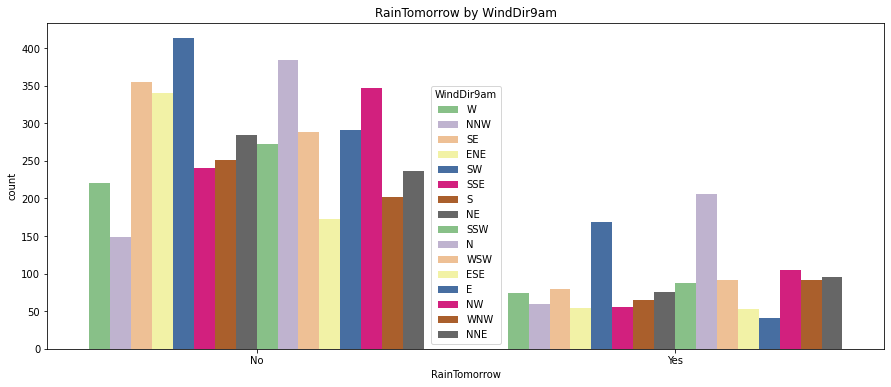

In [82]:
#let's visualize the relationship between RainTomorrow and WindDir9am
plt.figure(figsize=(15,6))
sns.countplot(x=df['RainTomorrow'],hue='WindDir9am',data=df, palette = 'Accent').set_title("RainTomorrow by WindDir9am")
plt.show()

In [83]:
df.groupby('RainTomorrow')['WindDir9am'].value_counts()


RainTomorrow  WindDir9am
No            SW            413
              N             384
              SE            355
              NW            347
              ENE           340
              E             291
              WSW           288
              NE            284
              SSW           272
              S             251
              SSE           240
              NNE           236
              W             220
              WNW           202
              ESE           173
              NNW           149
Yes           N             206
              SW            168
              NW            105
              NNE            95
              WNW            92
              WSW            92
              SSW            88
              SE             79
              NE             75
              W              74
              S              65
              NNW            59
              SSE            55
              ENE            54
              E

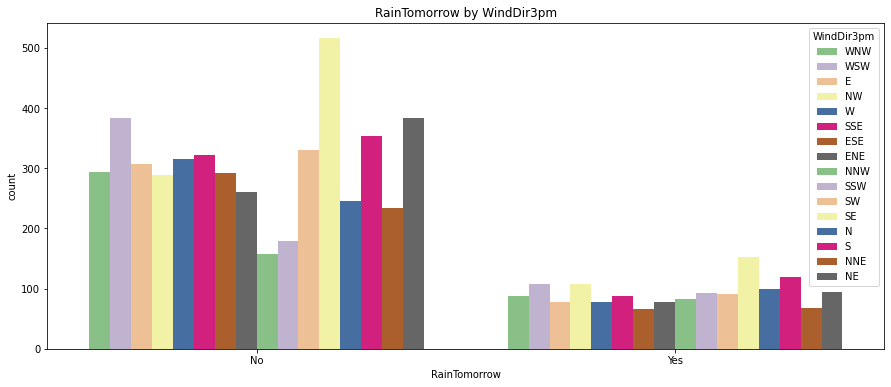

In [84]:
#let's visualize the relationship between RainTomorrow and WindDir3pm
plt.figure(figsize=(15,6))
sns.countplot(x=df['RainTomorrow'],hue='WindDir3pm',data=df, palette = 'Accent').set_title("RainTomorrow by WindDir3pm")
plt.show()

In [85]:
df.groupby('RainTomorrow')['WindDir3pm'].value_counts()

RainTomorrow  WindDir3pm
No            SE            516
              NE            383
              WSW           383
              S             354
              SW            330
              SSE           322
              W             315
              E             307
              WNW           293
              ESE           292
              NW            288
              ENE           261
              N             246
              NNE           234
              SSW           179
              NNW           157
Yes           SE            152
              S             119
              NW            108
              WSW           107
              N             100
              NE             94
              SSW            92
              SW             91
              SSE            88
              WNW            88
              NNW            82
              E              78
              W              78
              ENE            77
              N

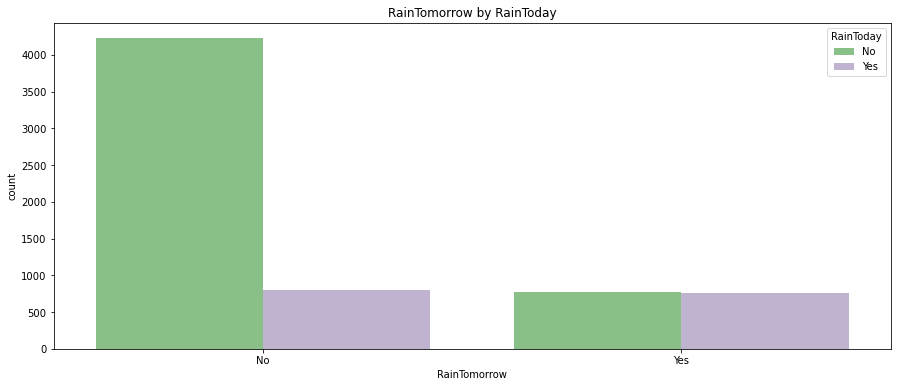

In [86]:
#let's visualize the relationship between RainTomorrow and RainToday
plt.figure(figsize=(15,6))
sns.countplot(x=df['RainTomorrow'],hue='RainToday',data=df, palette = 'Accent').set_title("RainTomorrow by RainToday")
plt.show()

In [87]:
df.groupby('RainTomorrow')['RainToday'].value_counts()

RainTomorrow  RainToday
No            No           4226
              Yes           797
Yes           No            779
              Yes           756
Name: RainToday, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='MaxTemp'>

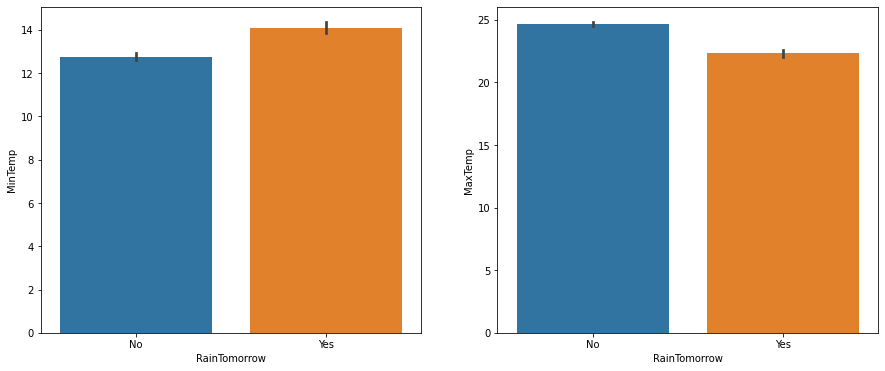

In [97]:
# let's visualize the MinTemp and MaxTemp with RainTomorrow
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(y='MinTemp',x = 'RainTomorrow',data = df)
plt.subplot(1,2,2)
sns.barplot(y='MaxTemp',x = 'RainTomorrow',data = df)

### For the distribution of variable MaxTemp, We see that the mean of the maximum temperature in Australia is between 20 and 23 degrees.
### For the distribution of the variable MinTemp, We see that the mean of the minimum temperature in Australia is between 8 and 12 degrees.¶


<Figure size 432x360 with 0 Axes>

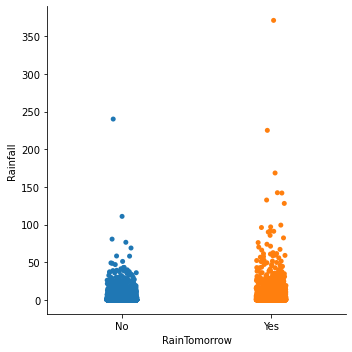

In [93]:
# let's visualize the relationship between Rainfall and RainTomorrow
plt.figure(figsize = (6,5))
sns.catplot(y='Rainfall',x = 'RainTomorrow',data = df)
plt.show()

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed3pm'>

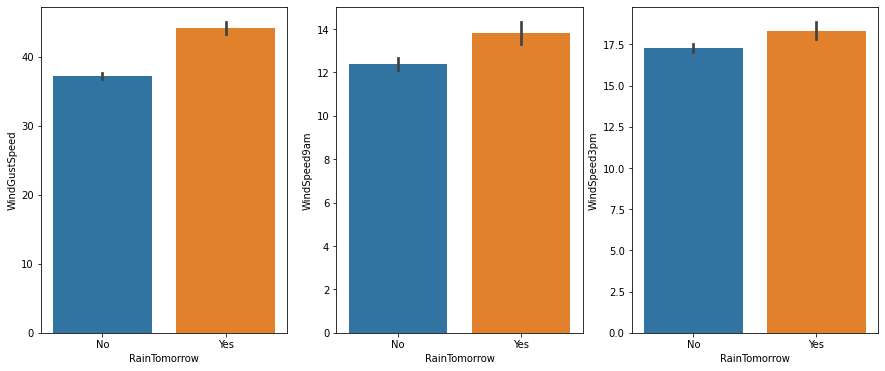

In [102]:
# let's visualize the relationship WindGustSpeed,WindSpeed9am and WindSpeed3pm with RainTomorrow
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.barplot(y='WindGustSpeed',x = 'RainTomorrow',data = df)
plt.subplot(1,3,2)
sns.barplot(y='WindSpeed9am',x = 'RainTomorrow',data = df)
plt.subplot(1,3,3)
sns.barplot(y='WindSpeed3pm',x = 'RainTomorrow',data = df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed3pm'>

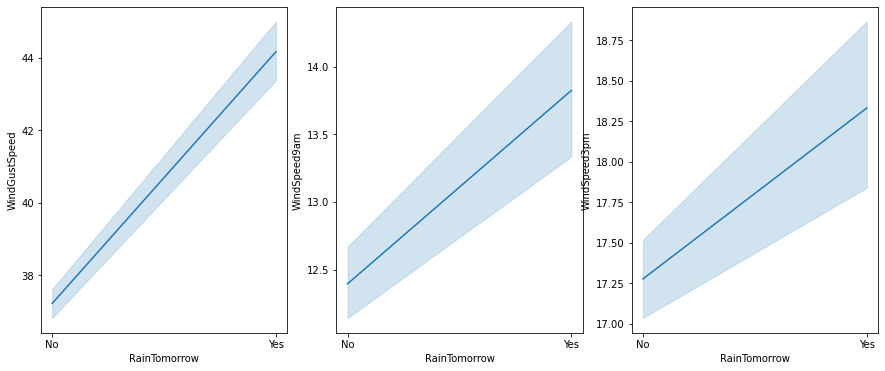

In [104]:
# let's visualize the relationship WindGustSpeed,WindSpeed9am and WindSpeed3pm with RainTomorrow
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.lineplot(y='WindGustSpeed',x = 'RainTomorrow',data = df)
plt.subplot(1,3,2)
sns.lineplot(y='WindSpeed9am',x = 'RainTomorrow',data = df)
plt.subplot(1,3,3)
sns.lineplot(y='WindSpeed3pm',x = 'RainTomorrow',data = df)

<Figure size 432x360 with 0 Axes>

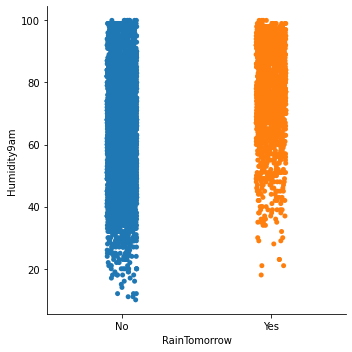

In [105]:
# let's visualize the relationship between Humidity9am and RainTomorrow
plt.figure(figsize = (6,5))
sns.catplot(y='Humidity9am',x = 'RainTomorrow',data = df)
plt.show()

<Figure size 432x360 with 0 Axes>

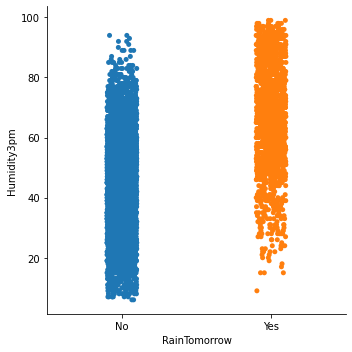

In [106]:
# let's visualize the relationship between Humidity3pm and RainTomorrow
plt.figure(figsize = (6,5))
sns.catplot(y='Humidity3pm',x = 'RainTomorrow',data = df)
plt.show()

<Figure size 432x360 with 0 Axes>

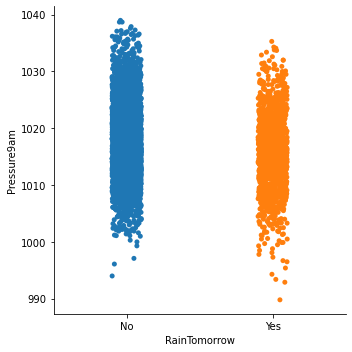

In [109]:
# let's visualize the relationship between Pressure9am and RainTomorrow
plt.figure(figsize = (6,5))
sns.catplot(y='Pressure9am',x = 'RainTomorrow',data = df)
plt.show()

<Figure size 432x360 with 0 Axes>

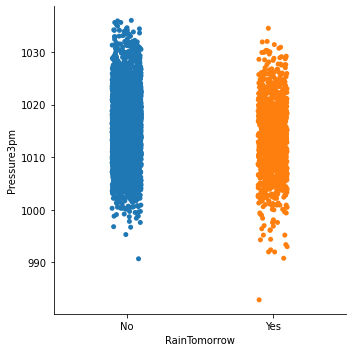

In [110]:
# let's visualize the relationship between Pressure3pm and RainTomorrow
plt.figure(figsize = (6,5))
sns.catplot(y='Pressure3pm',x = 'RainTomorrow',data = df)
plt.show()

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

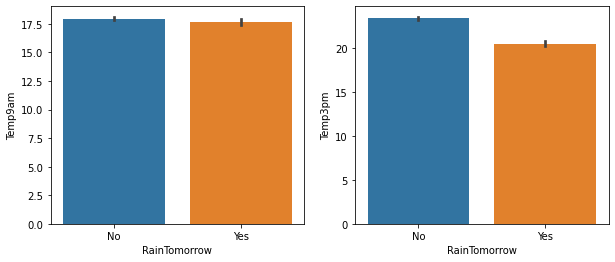

In [113]:
# let's visualize the Temp9am and Temp3pm with RainTomorrow
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(y='Temp9am',x = 'RainTomorrow',data = df)
plt.subplot(1,2,2)
sns.barplot(y='Temp3pm',x = 'RainTomorrow',data = df)


In [169]:
df.shape

(6762, 21)

<Figure size 1080x432 with 0 Axes>

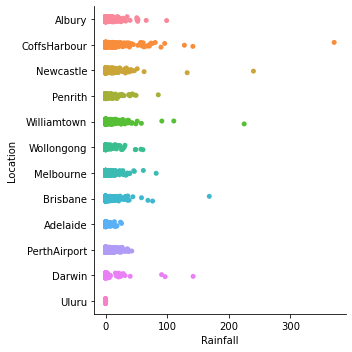

In [118]:
#let's visualize the relationship between Rainfall and location
plt.figure(figsize=(15,6))
sns.catplot(x='Rainfall',y='Location',data=df)
plt.show()

<Figure size 1080x432 with 0 Axes>

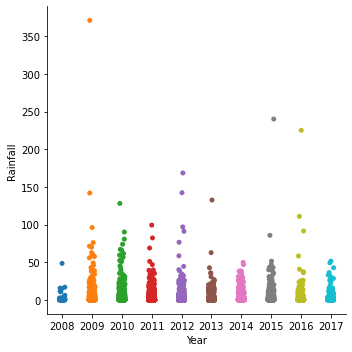

In [123]:
#let's visualize the relationship between Rainfall and year
plt.figure(figsize=(15,6))
sns.catplot(y='Rainfall',x='Year',data=df)
plt.show()

In [137]:
# converting text into numbers using label encoder
from sklearn.preprocessing import LabelEncoder
cat=[i for i in df.columns if df[i].dtypes=='O']
enc = LabelEncoder()
for i in cat:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [138]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,5,2008


In [161]:
#lets fill continuous columns with mean
for col in continuous.columns:
    continuous[col] = continuous[col].fillna(continuous[col].mean()) 

In [162]:
continuous.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7


In [157]:
# let's treat with nulls
for col in categorical.columns:
    categorical[col] = categorical[col].fillna(categorical[col].mode()) 

In [158]:
categorical.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [159]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,5,2008


In [163]:
df.isna().sum()

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
WindGustDir         0
WindGustSpeed     942
WindDir9am          0
WindDir3pm          0
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Temp9am            51
Temp3pm            92
RainToday           0
RainTomorrow        0
Day                 0
Month               0
Year                0
dtype: int64

In [164]:
# let's treat with nulls
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean()) 

In [165]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [166]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,5,2008


In [167]:
# stats about data
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,5.323721,13.109145,24.098345,2.780148,8.839397,38.977663,8.539781,8.147146,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,17.895038,22.708561,0.273292,0.273292,15.726856,6.472493,2012.052203
std,3.099455,5.540667,6.130123,10.482769,5.349625,13.376457,5.096202,4.782762,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,5.722411,5.971845,0.489342,0.489342,8.793499,3.406784,2.301057
min,0.000000,-2.000000,8.200000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,2.250000,9.000000,19.600000,0.000000,4.000000,30.000000,4.000000,4.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,13.900000,18.400000,0.000000,0.000000,8.000000,4.000000,2010.000000
50%,6.000000,13.109145,23.500000,0.000000,9.000000,38.977663,9.000000,9.000000,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,17.900000,22.300000,0.000000,0.000000,16.000000,6.000000,2012.000000
75%,8.000000,17.400000,28.400000,1.200000,14.000000,46.000000,13.000000,12.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,22.200000,26.800000,1.000000,1.000000,23.000000,9.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,16.000000,107.000000,16.000000,16.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,39.400000,44.100000,2.000000,2.000000,31.000000,12.000000,2017.000000


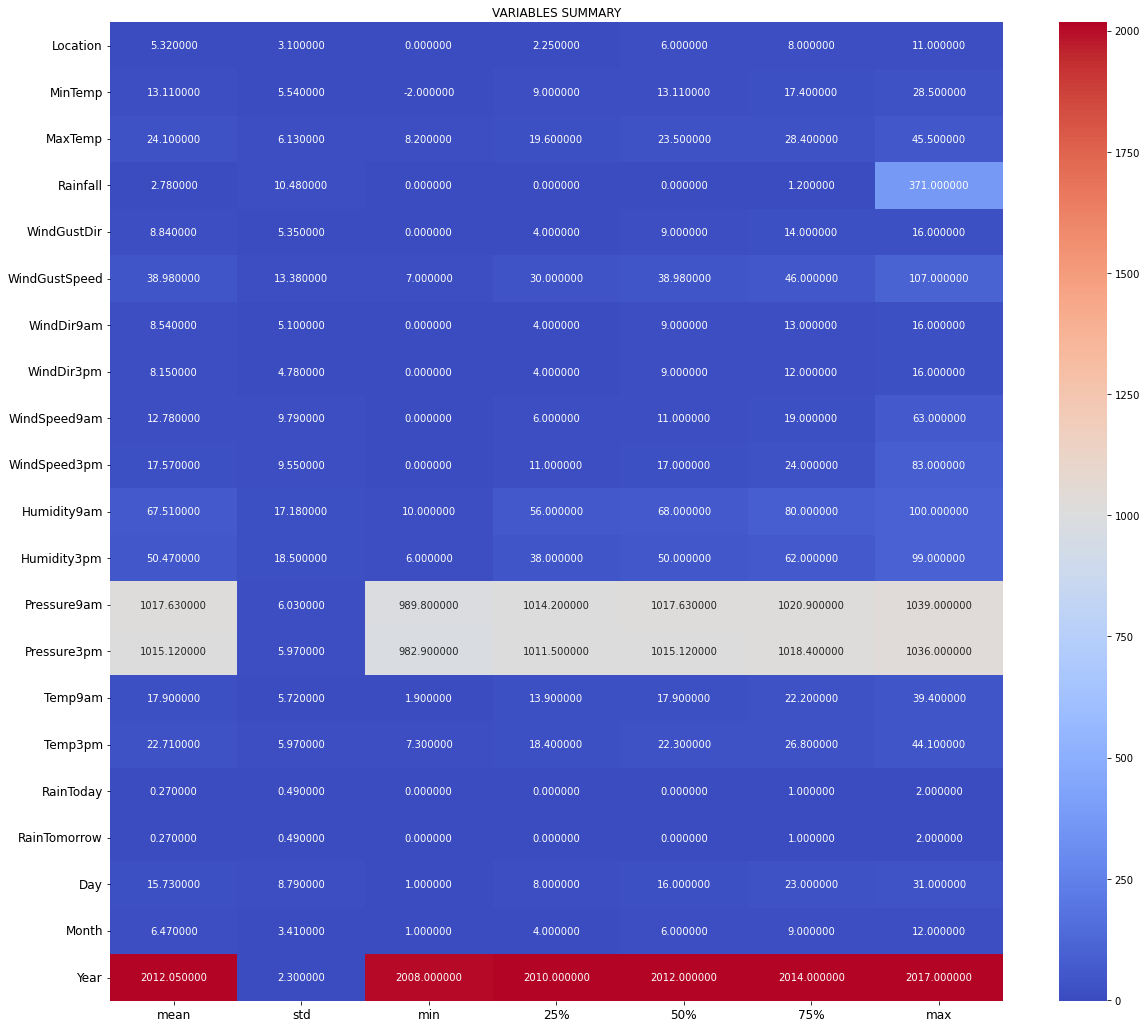

In [168]:
df.describe()
plt.figure(figsize=(20,18))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("VARIABLES SUMMARY")
plt.show()

## Observations:-
- In variable summery Rainfall and Maxtemp indicating the presence of outliers
- Windspeed3pm and Windspeed9am are also indicating the presence of outliers.


## Normal Distribution curve for every individual column


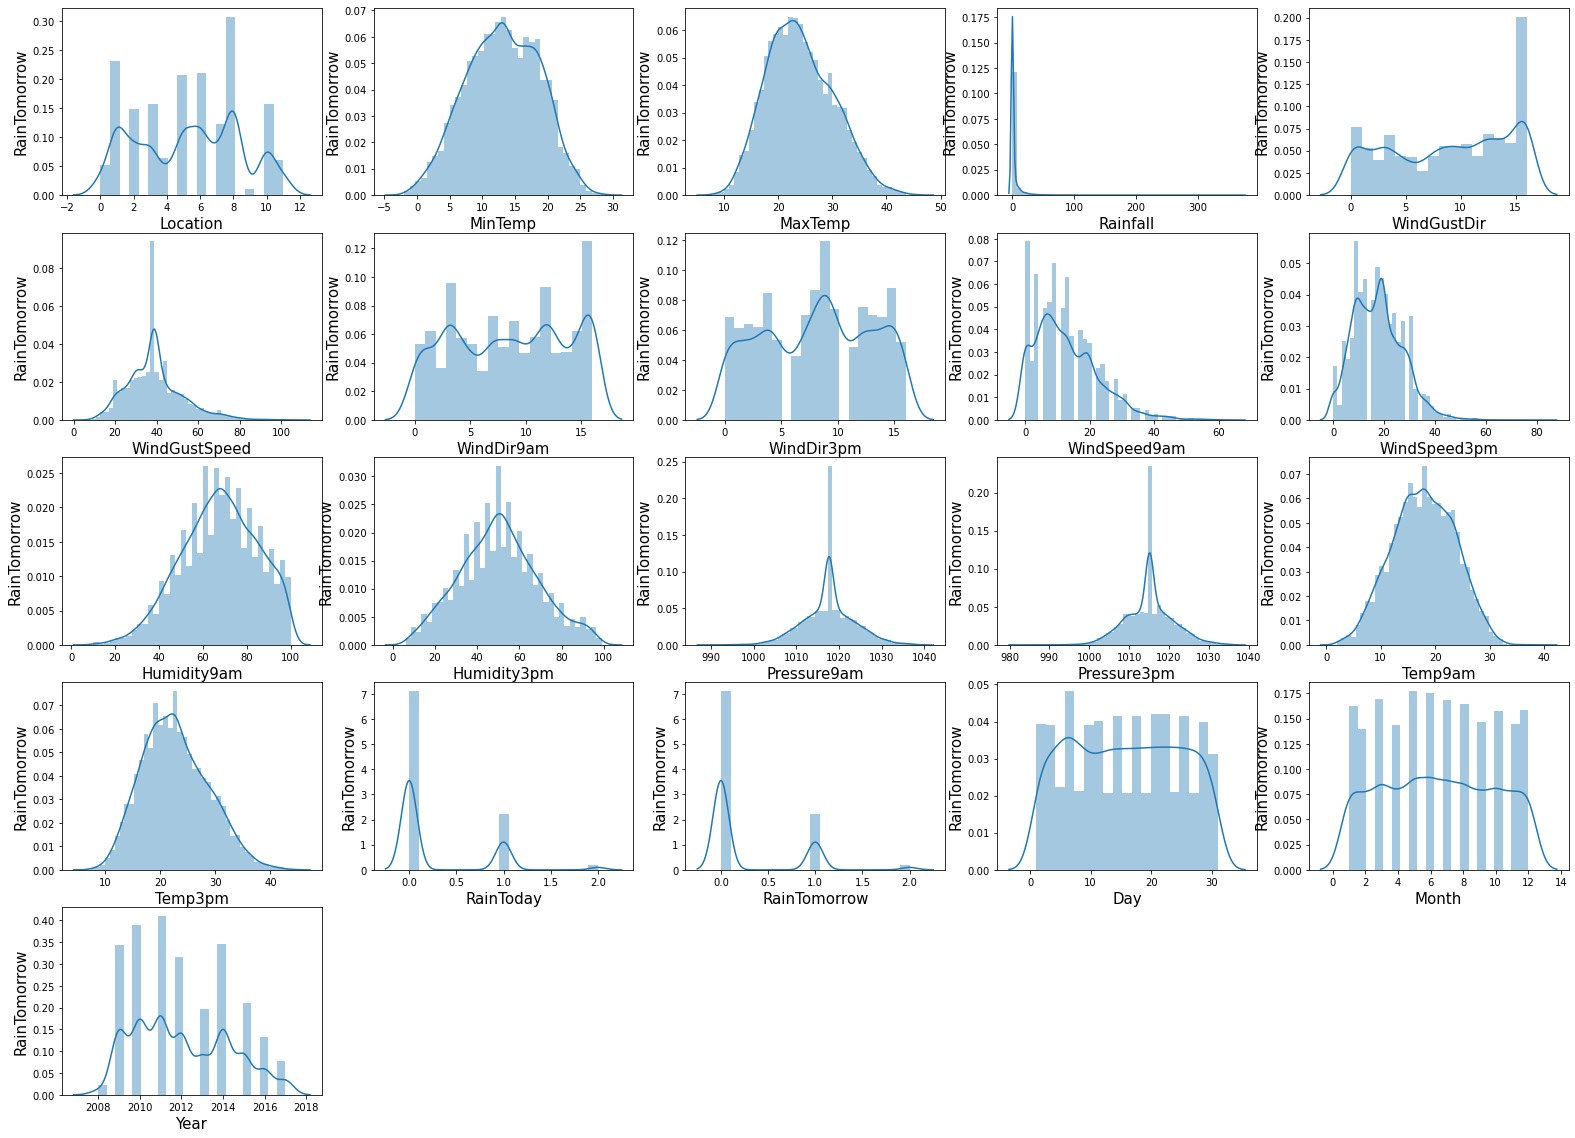

In [171]:
# let's visualize the data using distribution plot
plt.figure(figsize=(27,20))
pn = 1
for col in df:
    if pn <= 21:
        ax = plt.subplot(5,5,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('RainTomorrow',fontsize = 15)
    pn +=1
plt.show()    

### Pressure3pm,Pressure9am,Rainfall,Maxtemp,Windspeed3pm,Windspeed9am and Temp3pm  features are indicating the presence of outliers.skewness is also present 


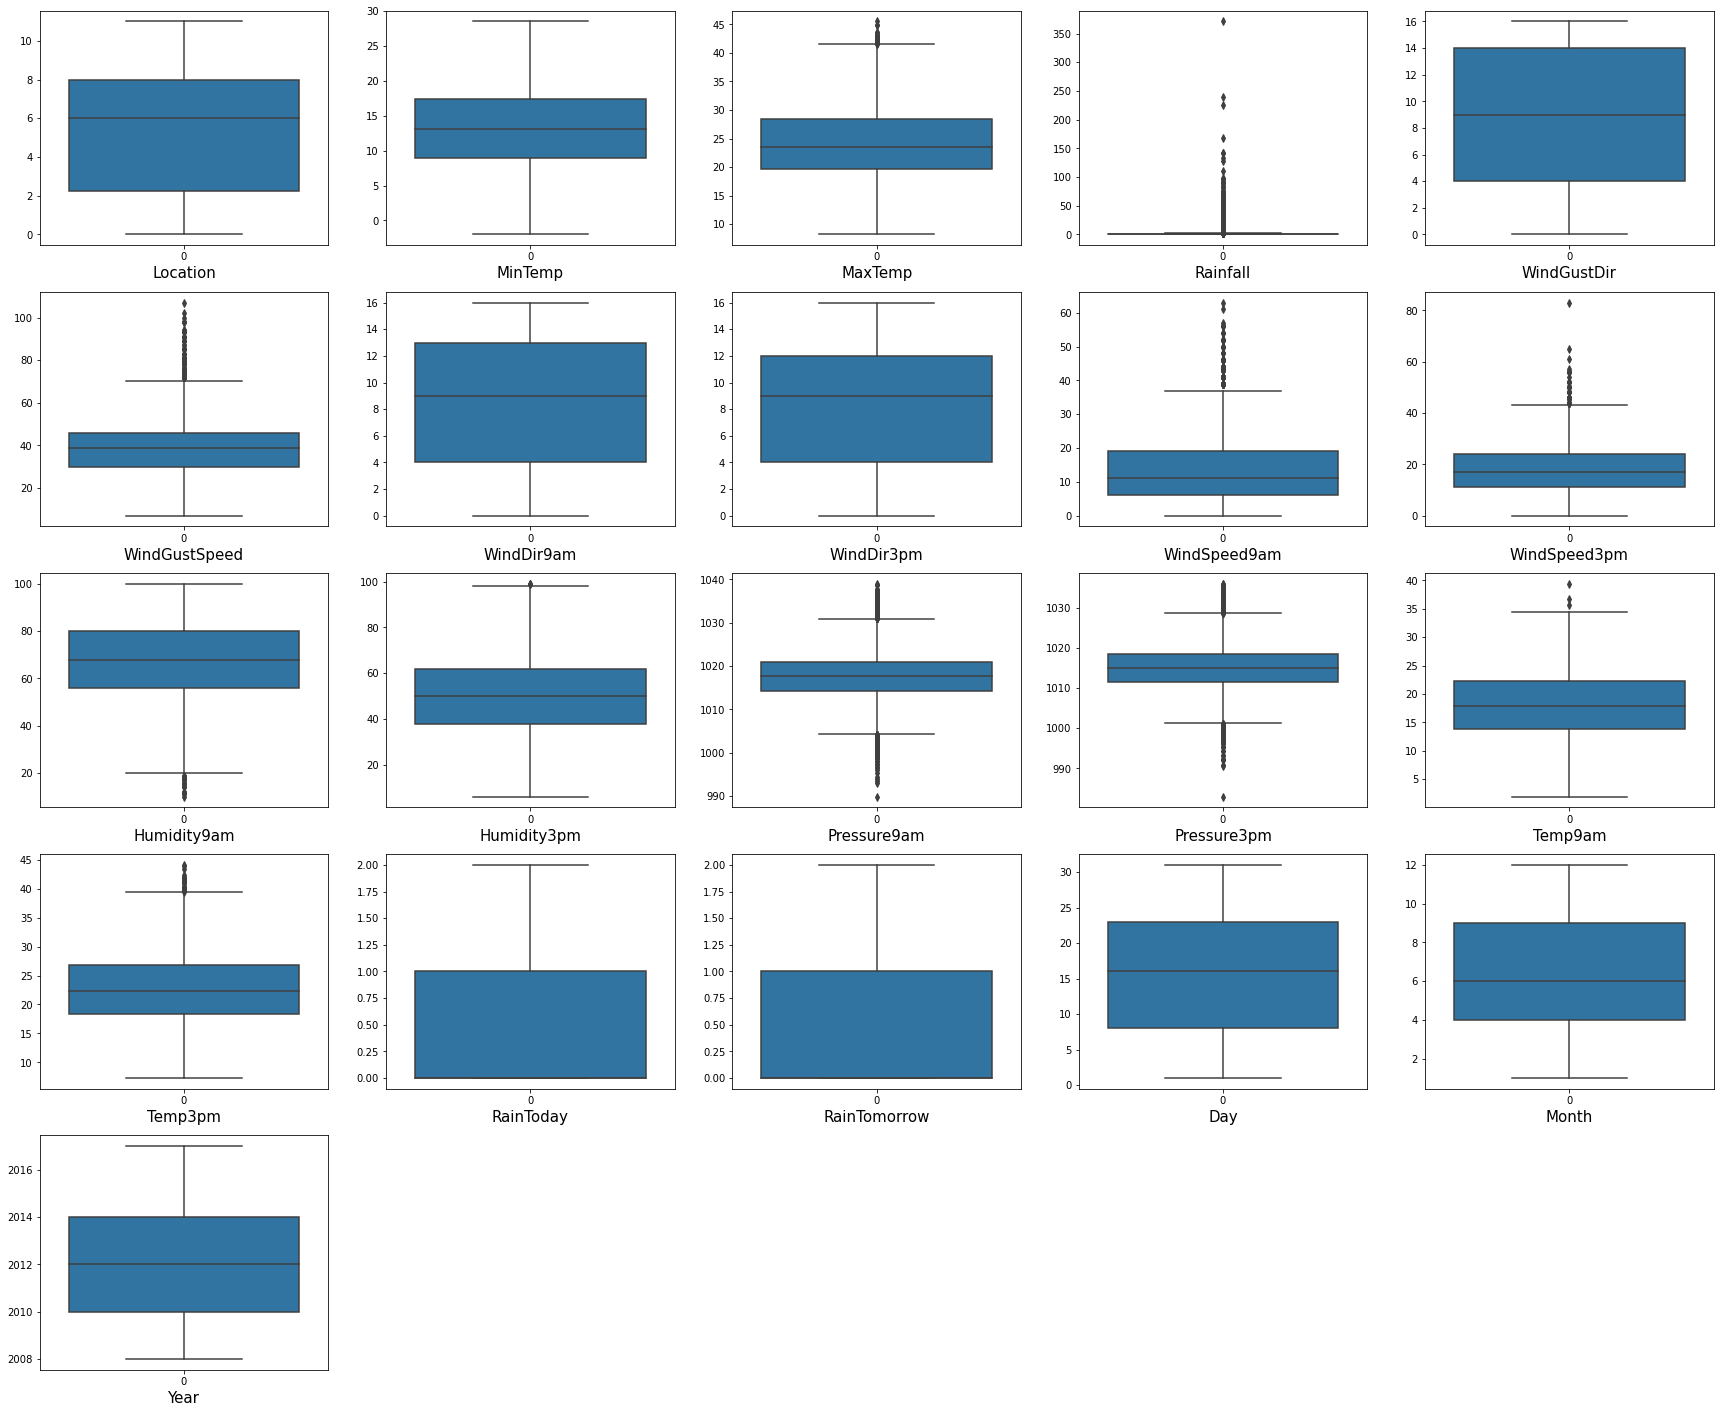

In [175]:
plt.figure(figsize=(30,25))
pn = 1
for col in df:
    if pn <= 21:
        ax = plt.subplot(5,5,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

### as per my observation, Pressure3pm,Pressure9am,Rainfall,Maxtemp,Windspeed3pm,Windspeed9am and Temp3pm features are indicating the presence of outliers. we will remove the outliers by using zscore technique 

## Removing Outliers


In [197]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (6267, 18)
Shape of the dataframe after removing outliers:  (6014, 18)
Percentage of data loss post outlier removal:  4.037019307483645


## Correlation


In [177]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.089269,0.073291,0.008802,0.013911,0.275680,-0.131189,0.006801,0.250381,0.227060,-0.036361,-0.002881,-0.027719,-0.013609,0.098045,0.069808,-0.003256,0.000167,-0.020324,-0.044691,0.502390
MinTemp,0.089269,1.000000,0.730881,0.099567,-0.147760,0.247039,-0.146128,-0.157122,0.177821,0.199109,-0.151470,0.079683,-0.448572,-0.448484,0.894024,0.699261,0.074703,0.099043,-0.027762,-0.122457,0.025906
MaxTemp,0.073291,0.730881,1.000000,-0.140293,-0.215114,0.176737,-0.250839,-0.181178,0.067806,0.131655,-0.417676,-0.418334,-0.349390,-0.425882,0.865062,0.975104,-0.223674,-0.158075,-0.017425,-0.081054,0.078719
Rainfall,0.008802,0.099567,-0.140293,1.000000,0.085767,0.095771,0.113759,0.075356,0.044862,0.032750,0.306709,0.305610,-0.118415,-0.057864,-0.030718,-0.149953,0.700282,0.285477,-0.006609,-0.011173,-0.000823
WindGustDir,0.013911,-0.147760,-0.215114,0.085767,1.000000,0.024615,0.398256,0.508568,-0.192315,-0.049158,0.130422,0.123229,-0.092805,-0.018104,-0.172154,-0.223411,0.108459,0.040320,0.013678,0.030541,0.149052
WindGustSpeed,0.275680,0.247039,0.176737,0.095771,0.024615,1.000000,-0.192329,0.075357,0.563909,0.611905,-0.278609,-0.105494,-0.361775,-0.328160,0.230194,0.144853,0.081070,0.164059,-0.000094,0.041498,-0.016471
WindDir9am,-0.131189,-0.146128,-0.250839,0.113759,0.398256,-0.192329,1.000000,0.222298,-0.314519,-0.186512,0.229232,0.183432,0.050608,0.117170,-0.212156,-0.250545,0.138137,0.025589,0.021153,-0.030034,0.053867
WindDir3pm,0.006801,-0.157122,-0.181178,0.075356,0.508568,0.075357,0.222298,1.000000,-0.027174,0.008767,0.037005,0.023541,-0.127013,-0.043167,-0.171047,-0.187879,0.098293,0.013157,0.011899,-0.007335,0.051958
WindSpeed9am,0.250381,0.177821,0.067806,0.044862,-0.192315,0.563909,-0.314519,-0.027174,1.000000,0.538955,-0.391539,-0.133181,-0.152257,-0.120060,0.162841,0.056118,0.037708,0.039617,-0.012708,0.029198,-0.108771
WindSpeed3pm,0.227060,0.199109,0.131655,0.032750,-0.049158,0.611905,-0.186512,0.008767,0.538955,1.000000,-0.266121,-0.099301,-0.227657,-0.184352,0.225808,0.109763,0.019832,0.019429,-0.010320,0.044938,-0.090936


In [178]:
# let's check the correation with RainTomorrow
df.corr()['RainTomorrow'].sort_values


<bound method Series.sort_values of Location         0.000167
MinTemp          0.099043
MaxTemp         -0.158075
Rainfall         0.285477
WindGustDir      0.040320
WindGustSpeed    0.164059
WindDir9am       0.025589
WindDir3pm       0.013157
WindSpeed9am     0.039617
WindSpeed3pm     0.019429
Humidity9am      0.290374
Humidity3pm      0.475824
Pressure9am     -0.144990
Pressure3pm     -0.119661
Temp9am         -0.023632
Temp3pm         -0.203232
RainToday        0.313394
RainTomorrow     1.000000
Day             -0.000069
Month           -0.014427
Year            -0.003404
Name: RainTomorrow, dtype: float64>

In [179]:
# let's check the correation with Rainfall
df.corr()['Rainfall'].sort_values


<bound method Series.sort_values of Location         0.008802
MinTemp          0.099567
MaxTemp         -0.140293
Rainfall         1.000000
WindGustDir      0.085767
WindGustSpeed    0.095771
WindDir9am       0.113759
WindDir3pm       0.075356
WindSpeed9am     0.044862
WindSpeed3pm     0.032750
Humidity9am      0.306709
Humidity3pm      0.305610
Pressure9am     -0.118415
Pressure3pm     -0.057864
Temp9am         -0.030718
Temp3pm         -0.149953
RainToday        0.700282
RainTomorrow     0.285477
Day             -0.006609
Month           -0.011173
Year            -0.000823
Name: Rainfall, dtype: float64>

### Checking correlation with Rainfall

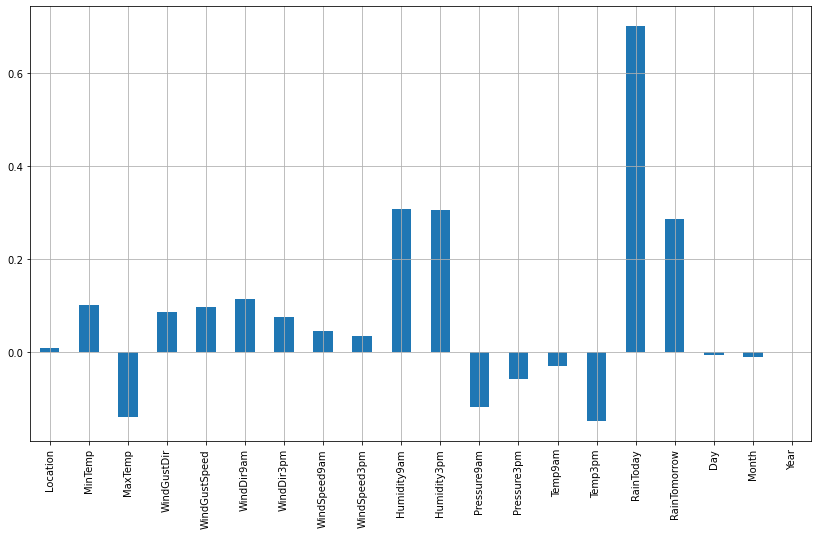

In [180]:
df.drop('Rainfall',axis=1).corrwith(df.Rainfall).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

### Checking correlation with RainTomorrow

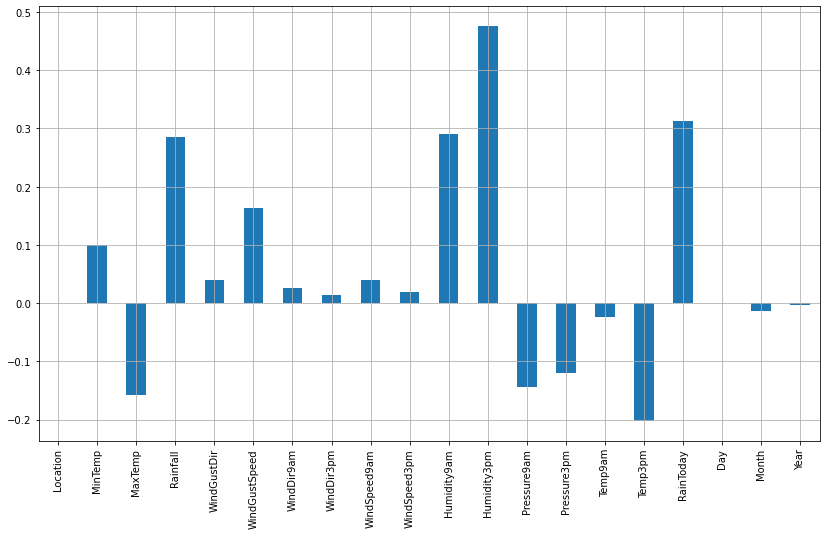

In [181]:
df.drop('RainTomorrow',axis=1).corrwith(df.RainTomorrow).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

<AxesSubplot:>

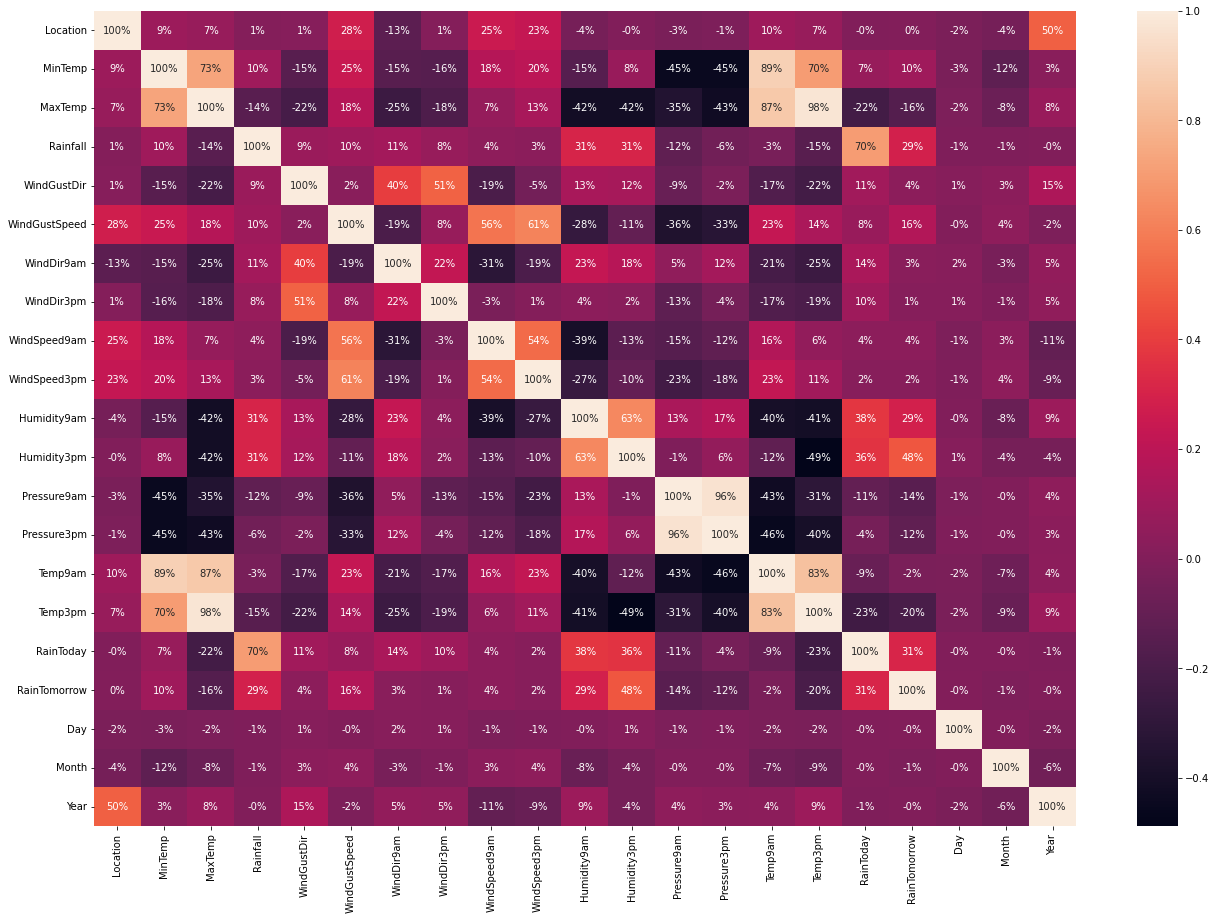

In [182]:
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

## Obserrvations:-
- Maxtemp,pressure9am,pressure3pm,temp9am,temp3pm  are negatively correlated with target.
- MaxTemp, Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm are positively correlated with target variable
- Pressure9am and Pressure3pm are highly correlated
- maxtemp and temp3pm are highly correlated
- mintemp and temp9am are highly correlated
- maximum correlation : RainToday
- minimum correlation : location                              
                                  

In [184]:
df.drop(columns=['Pressure9am','Temp3pm','Temp9am'],inplace=True)

In [198]:
df.drop(columns=['MaxTemp','MinTemp'],inplace=True)

In [199]:
df.shape

(6014, 16)

## Skewness

In [200]:
df.skew()

Location        -0.003489
Rainfall         2.939285
WindGustDir     -0.199445
WindGustSpeed    0.375932
WindDir9am      -0.074895
WindDir3pm      -0.062265
WindSpeed9am     0.639428
WindSpeed3pm     0.289809
Humidity9am     -0.217387
Humidity3pm      0.160538
Pressure3pm      0.098514
RainToday        1.479482
RainTomorrow     1.415676
Day              0.011445
Month            0.027347
Year             0.336687
dtype: float64

## Dividing data in features and label


In [214]:
x = df.drop('Rainfall',axis = 1)
x.head()

,Location,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,Day,Month
0,1,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.1,0,0,12,1
1,1,14,44.0,6,15,4.0,22.0,44.0,25.0,1007.8,0,0,12,2
2,1,15,46.0,13,15,19.0,26.0,38.0,30.0,1008.7,0,0,12,3
3,1,4,24.0,9,0,11.0,9.0,45.0,16.0,1012.8,0,0,12,4
4,1,13,41.0,1,7,7.0,20.0,82.0,33.0,1006.0,0,0,12,5


In [216]:
y=df['Rainfall']

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [217]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,Location,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,Day,Month
0,-1.444802,0.788840,0.584855,0.870588,1.186972,0.937882,0.819392,0.199085,-1.604028,-2.025047e-13,-0.504205,-0.517404,-0.337539,-1.738938
1,-1.444802,0.955365,0.584855,-0.424016,1.367167,-0.842705,0.617904,-1.358831,-1.413237,-1.848521e-13,-0.504205,-0.517404,-0.337539,-1.351071
2,-1.444802,1.119872,0.741972,0.870588,1.367167,0.854373,1.016376,-1.678024,-1.104578,-1.623146e-13,-0.504205,-0.517404,-0.337539,-0.997633
3,-1.444802,-0.844539,-1.176923,0.156100,-1.853473,0.090958,-0.852152,-1.304550,-2.001540,-6.061818e-14,-0.504205,-0.517404,-0.337539,-0.667770
4,-1.444802,0.788840,0.343955,-1.559638,-0.161546,-0.391751,0.411405,0.881023,-0.924173,-2.303158e-13,-0.504205,-0.517404,-0.337539,-0.355555
5,-1.444802,0.955365,1.491366,0.870588,1.004231,0.854373,0.819392,-0.746209,-1.539912,-2.455258e-13,-0.504205,-0.517404,-0.337539,-0.057290
6,-1.444802,0.788840,1.048568,0.696950,1.004231,0.937882,0.819392,-1.084516,-1.799822,-1.748046e-13,-0.504205,-0.517404,-0.337539,0.229531
7,-1.444802,0.788840,-0.159089,0.340060,1.004231,-0.530690,0.090856,-1.139951,-1.799822,-1.273426e-13,-0.504205,-0.517404,-0.337539,0.506707
8,-1.444802,0.788840,-0.789689,-0.032142,0.438297,0.497090,-0.600948,-0.573564,-1.288477,-2.379208e-13,1.983318,-0.517404,-0.337539,1.037220
9,-1.444802,-1.050870,-0.603964,0.340060,-1.292550,0.680763,-1.257960,-1.139951,-1.604028,-1.623146e-13,-0.504205,1.932727,-0.337539,1.292432


In [218]:
pd.DataFrame(x).skew().sort_values()

WindGustDir     -0.331991
WindDir9am      -0.255541
WindDir3pm      -0.244402
Day             -0.207985
Location        -0.191971
Month           -0.156226
WindSpeed9am    -0.138747
WindSpeed3pm    -0.090375
Humidity9am     -0.065942
Humidity3pm     -0.035719
Pressure3pm      0.000000
WindGustSpeed    0.000971
RainTomorrow     1.415676
RainToday        1.479482
dtype: float64

### Every value will be reduced after transformation


In [219]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-1.44480245,  0.7888403 ,  0.58485514, ..., -0.51740369,
        -0.33753853, -1.73893845],
       [-1.44480245,  0.95536545,  0.58485514, ..., -0.51740369,
        -0.33753853, -1.3510715 ],
       [-1.44480245,  1.11987151,  0.74197214, ..., -0.51740369,
        -0.33753853, -0.99763267],
       ...,
       [ 1.16197487, -0.4528002 , -1.37960067, ..., -0.51740369,
         0.73678562, -0.05728965],
       [ 1.16197487, -1.05086964,  0.01200088, ..., -0.51740369,
         0.8360169 , -0.05728965],
       [ 1.16197487,  0.09862145, -0.78968899, ..., -0.51740369,
         0.93409621, -0.05728965]])

## Final features Multi-Collinearity Check using VIF**


In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Location,1.133163
1,WindGustDir,1.611075
2,WindGustSpeed,2.025786
3,WindDir9am,1.400264
4,WindDir3pm,1.382261
5,WindSpeed9am,2.006007
6,WindSpeed3pm,1.776315
7,Humidity9am,2.263338
8,Humidity3pm,2.003999
9,Pressure3pm,1.158086


### There is no sign of Multi-collinearity

In [221]:

df.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,Day,Month
0,1,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.1,0,0,12,1
1,1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1007.8,0,0,12,2
2,1,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1008.7,0,0,12,3
3,1,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1012.8,0,0,12,4
4,1,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1006.0,0,0,12,5


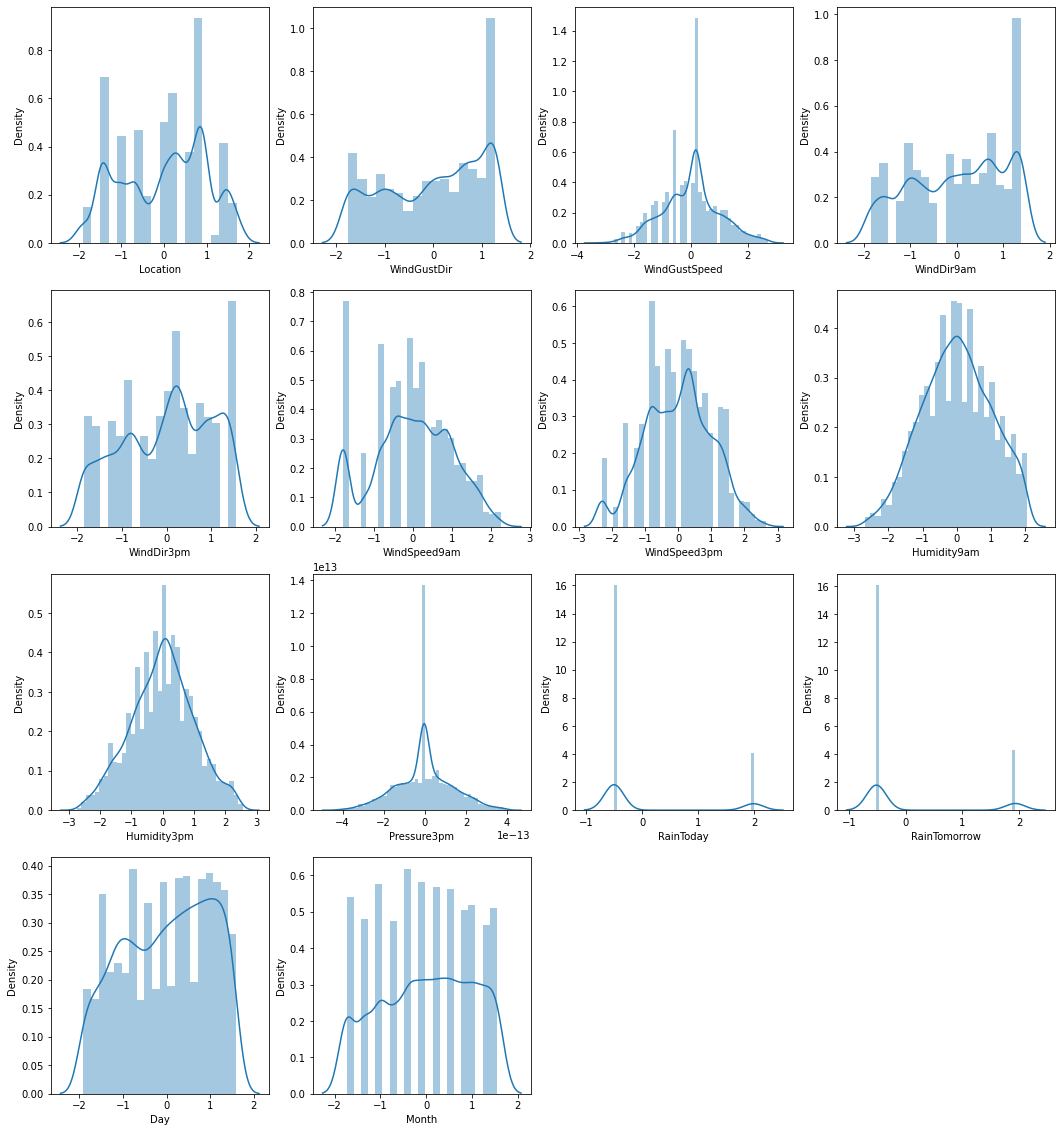

In [222]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally. Now ,our model is ready for model building


# Model selection/predictions


## Regression because our Target variable 'Rainfall' is continuous.


### Finding the best Random state and maximum accuracy

In [224]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [241]:
maxAccu=0
maxRS=0

for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.6141186080204923 on Random State 307


**Splitting the data into Training and Testing**


In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=125)

**I am defining a function for splitting of the Training and Testing features alongwith Target, then it trains the model soon after training it predicts the Target and calculates RMSE score with R2 score alongwith this it calculates the Cross Validation score and finally it finds the difference between the R2 score and Cross Validation score.**

In [256]:
# Regression Model Function

def reg(model, x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=222)
    
    #Training the model
    model.fit(X_train, Y_train)
    
    #Predicting Y_test
    pred = model.predict(X_test)
    
    #RMSE
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    #R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #CV Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Difference
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

## Linear Regression


In [259]:
#Linear regression
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 1.8747388317687048
R2 Score is: 61.9133937303084
Cross Validation Score: 61.27664505265298
R2 Score - Cross Validation Score is 0.6367486776554188


**Ridge Regression**

In [260]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 1.8753736740828097
R2 Score is: 61.88759484812469
Cross Validation Score: 61.271498694769356
R2 Score - Cross Validation Score is 0.6160961533553362


## Decision Tree Regressor


In [232]:
# Decision Tree Regressor
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x, y)

RMSE Score is: 2.6239888501646123
R2 Score is: 25.622160790389525
Cross Validation Score: 12.879935262974868
R2 Score - Cross Validation Score is 12.742225527414657


## Random Forest Regressor


In [240]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 2.0277799728661092
R2 Score is: 49.49744055110649
Cross Validation Score: 42.35781709790402
R2 Score - Cross Validation Score is 7.139623453202475


## KNeighbors Regressor

In [250]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model,x,y)

RMSE Score is: 2.0917325937543487
R2 Score is: 46.00974515624961
Cross Validation Score: 43.7962426895181
R2 Score - Cross Validation Score is 2.213502466731505


## Support Vector Regression

In [258]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x, y)

RMSE Score is: 1.9985903303636183
R2 Score is: 56.71491348856302
Cross Validation Score: 55.20045571932408
R2 Score - Cross Validation Score is 1.5144577692389376


 ###  as per my observation , I choose Linear Regression as the best model as it's Training and Testing score are more than other models and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING

In [261]:
params = {'n_jobs':[20],
         'copy_X':[True,False],
         'fit_intercept':[True,False],
         'normalize':['deprecated']}

In [263]:
grd = GridSearchCV(lr,param_grid = params)
grd.fit(X_train,Y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [20],
                         'normalize': ['deprecated']})

In [264]:
lr = grd.best_estimator_
lr.fit(X_train,Y_train)

LinearRegression(n_jobs=20)

In [266]:
pred = lr.predict(X_test)
r2_score(Y_test,pred)*100

61.05507472122975

# save the final model


In [267]:
import joblib
joblib.dump(lr,'Rainfall prediction.pkl')

['Rainfall prediction.pkl']

# Model selection/predictions


## Classification because our Target variable 'RainTomorrow' is categorical.

In [268]:
### Dividing data in features and label
x1 = df.drop('RainTomorrow',axis = 1)
x1.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,Day,Month
0,1,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.1,0,12,1
1,1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1007.8,0,12,2
2,1,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1008.7,0,12,3
3,1,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1012.8,0,12,4
4,1,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1006.0,0,12,5


In [269]:
y1=df['RainTomorrow']

## Best Random State


In [271]:
# lets import all necessary libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [288]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.20, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train, Y_train)
    pred = dt.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 0.8029925187032418 on Random State 241


In [276]:
# create empty lits
accur_score=[]
c_v_score=[]
diff=[]

In [289]:
# classification model Function
def classify(model,x1,y1):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size= 0.20,random_state = 241)
    # training the model
    model.fit(x_train,y_train)
    
    # predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy score
    acc_score=(accuracy_score(y_test,pred))*100
    accur_score.append(acc_score)
    print('Accuracy score',acc_score)
    
    # Classification report
    class_report=classification_report(y_test,pred)
    print('\nClassification Report:\n',class_report)
    
    # Cross validation score
    cv_score=(cross_val_score(model,x1,y1,cv=15).mean())*100
    c_v_score.append(cv_score)
    print('Cross validation score',cv_score)
    
    # result of accuracy score minus cv_score
    result = acc_score-cv_score
    diff.append(result)
    print('\n Accuracy score - cross val score is:',result)


## Logistic regression


In [278]:
model=LogisticRegression()
classify(model,x1,y1)

Accuracy score 86.86616791354946

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       978
           1       0.74      0.45      0.56       225

    accuracy                           0.87      1203
   macro avg       0.81      0.71      0.74      1203
weighted avg       0.86      0.87      0.86      1203

Cross validation score 83.05673316708231

 Accuracy score - cross val score is: 3.809434746467147


### After setting the random state = 114, We got the accuracy score is 86%


## KNN

In [281]:
model = KNeighborsClassifier()
classify(model,x1,y1)

Accuracy score 86.28428927680798

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       955
           1       0.71      0.56      0.63       248

    accuracy                           0.86      1203
   macro avg       0.80      0.75      0.77      1203
weighted avg       0.86      0.86      0.86      1203

Cross validation score 81.26084788029925

 Accuracy score - cross val score is: 5.02344139650873


### After setting the random state = 494 , We got the accuracy score is 86%


## Random Forest


In [284]:
model =RandomForestClassifier()
classify(model,x1,y1)

Accuracy score 87.61429758935994

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       980
           1       0.75      0.50      0.60       223

    accuracy                           0.88      1203
   macro avg       0.82      0.73      0.76      1203
weighted avg       0.87      0.88      0.87      1203

Cross validation score 81.1283042394015

 Accuracy score - cross val score is: 6.485993349958434


### After setting the random state = 320 , We got the accuracy score is 87%


## AdaBoost

In [287]:
model=AdaBoostClassifier()
classify(model,x1,y1)

Accuracy score 87.11554447215295

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       980
           1       0.73      0.49      0.58       223

    accuracy                           0.87      1203
   macro avg       0.81      0.72      0.75      1203
weighted avg       0.86      0.87      0.86      1203

Cross validation score 79.78175394846218

 Accuracy score - cross val score is: 7.333790523690766


### After setting the random state = 320, We got the accuracy score is 87%


## Decision tree

In [290]:
model=DecisionTreeClassifier()
classify(model,x1,y1)

Accuracy score 78.71986699916874

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       949
           1       0.50      0.52      0.51       254

    accuracy                           0.79      1203
   macro avg       0.68      0.69      0.69      1203
weighted avg       0.79      0.79      0.79      1203

Cross validation score 73.33046550290939

 Accuracy score - cross val score is: 5.389401496259353


### After setting the random state = 241 , We got the accuracy score is 79%


## Compare the models


In [291]:
# create a list of labels of build models
label = ['LogisticRegression','KNN','Random Forest','AdaBoost','Decision Tree']
print(label)
print(accur_score)
print(c_v_score)
print(diff)


['LogisticRegression', 'KNN', 'Random Forest', 'AdaBoost', 'Decision Tree']
[86.86616791354946, 86.28428927680798, 87.61429758935994, 87.11554447215295, 78.71986699916874]
[83.05673316708231, 81.26084788029925, 81.1283042394015, 79.78175394846218, 73.33046550290939]
[3.809434746467147, 5.02344139650873, 6.485993349958434, 7.333790523690766, 5.389401496259353]


In [292]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Accuracy Score':accur_score,'Cross validation Score':c_v_score,'Difference':diff})
score_df

,Model name,Accuracy Score,Cross validation Score,Difference
0,LogisticRegression,86.866168,83.056733,3.809435
1,KNN,86.284289,81.260848,5.023441
2,Random Forest,87.614298,81.128304,6.485993
3,AdaBoost,87.115544,79.781754,7.333791
4,Decision Tree,78.719867,73.330466,5.389401


 ###  as per my observation , I choose Logistic Regression as the best model and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING OF FINAL MODEL


In [293]:
lr=LogisticRegression()


In [294]:
params = {
    'n_jobs':[50,60],
    'max_iter':[100],
    'fit_intercept':[True,False],
    'random_state':[30,40,50],
    'dual':[True,False]       }

In [296]:
grd = GridSearchCV(lr,param_grid = params)
grd.fit(X_train,Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100], 'n_jobs': [50, 60],
                         'random_state': [30, 40, 50]})

In [297]:
lr = grd.best_estimator_
lr.fit(X_train,Y_train)

LogisticRegression(fit_intercept=False, n_jobs=50, random_state=30)

In [298]:
pred = lr.predict(X_test)
accuracy_score(Y_test,pred)

0.8462177888611804

## Confusion Matrix of LogisticRegression

In [299]:
confusion_matrix(Y_test,pred)

array([[914,  47],
       [138, 104]], dtype=int64)

## ROC AUC Curve

In [300]:
from sklearn.metrics import plot_roc_curve

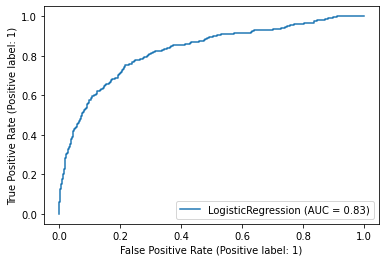

In [302]:
plot_roc_curve(lr,X_test,Y_test)
plt.show()

# Save the final model


In [303]:
import joblib
joblib.dump(lr,'Rainfall prediction.pkl')

['Rainfall prediction.pkl']